In [27]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.deepmaxent_irl_gridword import run_deepmaxent_irl
from src.maxent_irl_gridworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [25]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--width 6
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)
coor_rates = [
    ((args.height-2, args.width-2), 1.0), 
    ((0, args.width-1), 0.5), 
    ((1, 1), 0.5)
]
init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

test
start positions:  [[5, 3]]


## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--type grid
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, coor_rates, init_start_pos=init_start_pos)

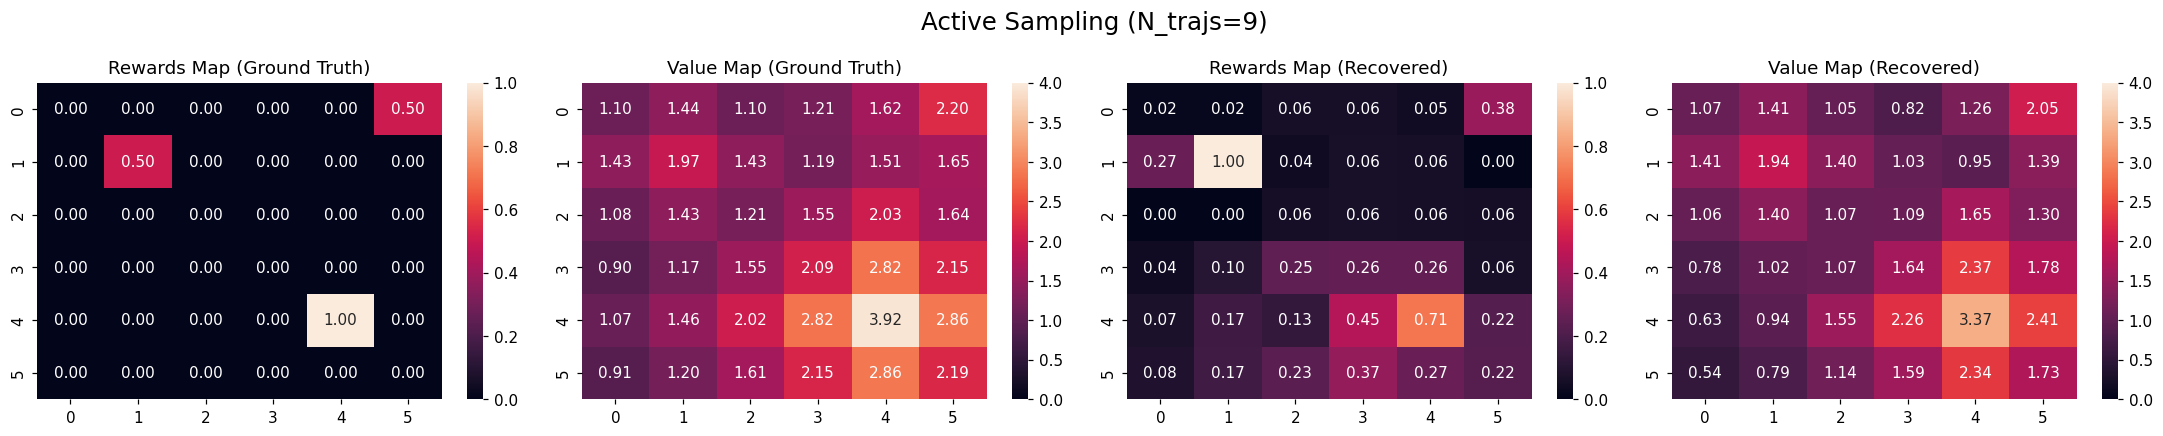

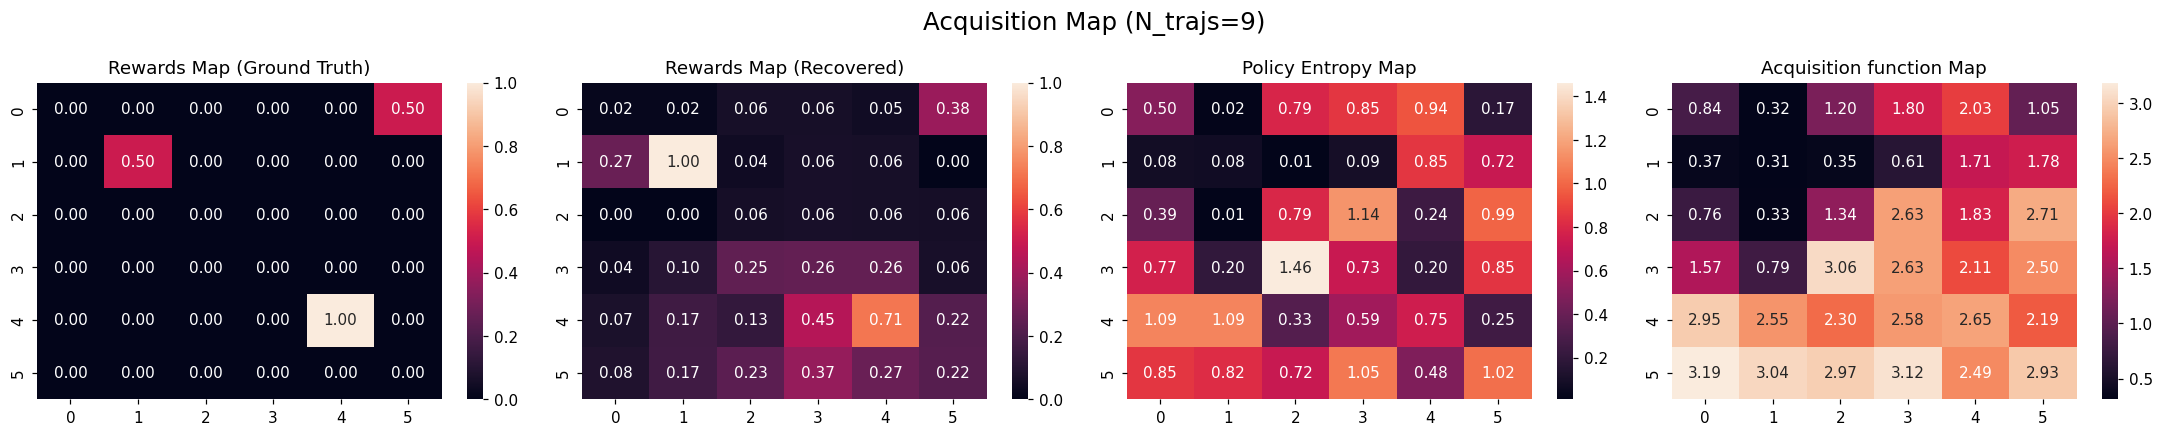

In [24]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [4]:
init_start_pos

[[5, 3]]

In [29]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type grid
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.02
--n_iters 30
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 1.0
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.5536 0.5757 0.4979 0.5325 0.6012 0.5641]
 [0.5896 0.582  0.5418 0.5521 0.5805 0.5534]
 [0.5141 0.5876 0.6266 0.5683 0.5787 0.6117]
 [0.5207 0.5712 0.5874 0.6263 0.6245 0.5783]
 [0.5382 0.5272 0.5411 0.9393 0.8931 1.    ]
 [0.5497 0.5463 0.     0.059  0.7277 0.8368]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 1.197126 ---
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[4.4896 4.619  4.1266 3.4891 3.1442 2.6951]
 [4.6111 4.3441 3.3324 2.5682 2.2685 1.7574]
 [3.9577 3.4424 2.8977 2.0266 1.8697 1.5609]
 [3.0063 2.4708 2.1925 1.9847 1.9605 1.6855]
 [2.3069 1.5337 1.626  2.281  2.4272 2.2764]
 [2.999  1.9184 1.3052 2.2673 2.7849 2.4893]]
[INFO - n_trajs:1] Generating a new demonstrations from [(0, 1)]
Visitation Frequency
[[0 1 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.2018 0.1388 0.2474 0.1654 0.3319 0.1498]
 [0.119  1.     0.0946 0.1058 0.0759 0.1745]
 [0.3481 0.     0.2344 0.0797 0.1208 0.6441]
 [0.2134 0.1375 0.1844 0.0472 0.7156 0.662 ]
 [0.1991 0.1376 0.1492 0.9091 0.9689 0.9922]
 [0.6613 0.0351 0.0744 0.0653 0.7914 0.8235]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 0.825880 ---
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[0.9262 0.1257 0.831  1.1544 1.5287 0.4859]
 [0.1181 0.058  0.1601 0.4829 1.058  0.7168]
 [0.6895 0.1962 1.3079 1.6941 1.2434 1.1282]
 [1.1476 1.3693 1.7416 1.6714 1.7097 1.6108]
 [0.1829 0.7913 1.2522 1.7929 2.3737 2.2637]
 [0.0606 0.2755 1.9671 2.2629 2.3881 2.2262]]
[INFO - n_trajs:2] Generating a new demonstrations from [(5, 4)]
Visitation Frequency
[[0 1 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 5 2]
 [0 0 0 1 2 1]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[0.2957 0.2879 0.1992 0.2002 0.3208 0.2738]
 [0.2003 1.     0.     0.197  0.2132 0.2915]
 [0.25   0.1063 0.1693 0.1977 0.2067 0.5984]
 [0.2722 0.1549 0.2292 0.2233 0.5882 0.549 ]
 [0.2272 0.2255 0.2875 0.8478 0.9827 0.9347]
 [0.5418 0.279  0.1784 0.1254 0.59   0.7928]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 0.557946 ---
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[0.5673 0.0508 0.0706 0.3182 1.1573 0.4492]
 [0.0667 0.0305 0.0976 0.6885 0.9025 0.7142]
 [0.3726 0.1075 0.9177 0.9636 1.1123 1.1555]
 [0.5576 0.5788 1.5189 1.2546 1.6789 1.7392]
 [0.8396 0.7774 1.1535 1.7123 2.5079 2.5641]
 [0.6415 1.6679 1.4138 1.3744 1.8845 2.1355]]
[INFO - n_trajs:3] Generating a new demonstrations from [(4, 5)]
Visitation Frequency
[[ 0  1  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1 10  3]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.1638 0.0985 0.1089 0.2281 0.3209 0.232 ]
 [0.1221 1.     0.0153 0.0912 0.1964 0.2275]
 [0.2023 0.     0.225  0.277  0.3533 0.5699]
 [0.2062 0.1596 0.2346 0.1941 0.5699 0.1173]
 [0.2036 0.1507 0.2704 0.697  0.918  0.5567]
 [0.5005 0.2998 0.2481 0.0396 0.5725 0.4864]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 0.160861 ---
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[0.8848 0.1113 0.6917 1.6385 0.814  1.301 ]
 [0.1036 0.0496 0.1573 0.6693 0.4481 1.3194]
 [0.5454 0.141  1.2616 1.274  0.5217 1.8322]
 [1.0013 0.4909 1.3126 1.0003 0.5805 1.2523]
 [1.3912 0.4816 0.5147 0.6453 0.7111 0.6521]
 [1.0139 1.7939 0.9904 1.1264 0.6566 1.4557]]
[INFO - n_trajs:4] Generating a new demonstrations from [(2, 5)]
Visitation Frequency
[[ 0  1  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  1  1]
 [ 0  0  0  1 12  3]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.2482 0.18   0.0259 0.1965 0.2809 0.2078]
 [0.0729 1.     0.     0.1798 0.2624 0.0069]
 [0.2896 0.0096 0.1956 0.2369 0.0873 0.5859]
 [0.2784 0.2512 0.1487 0.1007 0.8922 0.4702]
 [0.197  0.133  0.1358 0.7994 0.9756 0.6672]
 [0.5866 0.2709 0.042  0.0505 0.4267 0.572 ]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 0.257930 ---
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[0.6755 0.0824 0.3529 1.869  0.6194 0.6951]
 [0.1037 0.0503 0.1805 1.3149 0.6918 0.6994]
 [0.757  0.1621 1.4475 1.6065 0.9804 1.0491]
 [1.2658 0.5263 1.2963 1.4086 1.3907 1.3075]
 [0.2601 0.5034 0.7937 1.1152 1.4942 1.1574]
 [0.1262 0.3429 1.3107 0.8598 1.0299 1.06  ]]
[INFO - n_trajs:5] Generating a new demonstrations from [(0, 3)]
Visitation Frequency
[[ 0  1  0  1  2  3]
 [ 0  5  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  1  1]
 [ 0  0  0  1 12  3]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.1963 0.     0.0968 0.1056 0.6606 0.9162]
 [0.0871 0.9324 0.097  0.2006 0.001  0.0649]
 [0.1792 0.0751 0.2086 0.1697 0.1066 0.6224]
 [0.1633 0.1209 0.1461 0.1279 0.9568 0.5662]
 [0.2264 0.2717 0.0263 0.7244 1.     0.7244]
 [0.5513 0.2255 0.1184 0.1414 0.5357 0.5686]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 0.237731 ---
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[0.7315 0.0969 0.4258 0.1479 0.0996 0.053 ]
 [0.1257 0.0643 0.2127 1.1982 0.1853 0.0972]
 [0.9714 0.2447 1.985  1.6183 1.1461 1.1236]
 [1.9676 1.3331 0.9569 1.259  1.6962 1.485 ]
 [0.9262 0.6468 0.832  1.2306 1.7712 1.3822]
 [0.3824 1.4569 1.0927 1.3222 1.2373 1.198 ]]
[INFO - n_trajs:6] Generating a new demonstrations from [(2, 2)]
Visitation Frequency
[[ 0  1  0  1  2  3]
 [ 0  5  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  1  1  3  1]
 [ 0  0  0  1 13  3]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[0.1056 0.0956 0.2889 0.2956 0.8695 0.9262]
 [0.2191 0.9617 0.2553 0.1787 0.     0.0953]
 [0.3716 0.1985 0.2347 0.0181 0.0238 0.72  ]
 [0.362  0.0591 0.7339 0.8303 1.     0.5128]
 [0.2866 0.1848 0.1404 0.7607 0.9682 0.7674]
 [0.6895 0.2237 0.2184 0.2409 0.5578 0.4729]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 0.629075 ---
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[0.9922 0.3014 1.1233 1.1866 1.6223 1.1643]
 [0.3411 0.2896 0.4562 1.7027 1.2244 0.9565]
 [1.6349 0.4584 1.4108 1.984  2.291  2.6131]
 [2.1442 1.4496 2.1537 2.9335 3.3612 2.8473]
 [0.6214 1.8447 2.3355 2.9714 3.4664 2.9667]
 [0.3069 0.6862 2.3279 2.5205 2.5392 2.5777]]
[INFO - n_trajs:7] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[ 0  1  0  1  2  3]
 [ 0  5  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  1  1  3  1]
 [ 0  0  0  2 18  3]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.111  0.2193 0.153  0.1673 0.8259 0.9395]
 [0.0321 0.9378 0.     0.1853 0.0667 0.0943]
 [0.2711 0.107  0.1478 0.1261 0.0202 0.7475]
 [0.2174 0.2207 0.8059 0.8596 0.9691 0.546 ]
 [0.3257 0.1672 0.1863 0.9089 1.     0.7134]
 [0.6684 0.2023 0.1686 0.0999 0.4987 0.6346]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 0.525481 ---
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[0.6767 0.2099 0.7747 0.8177 1.0545 0.6811]
 [0.2315 0.1929 0.4438 2.1347 0.8885 0.6301]
 [1.5537 0.6041 1.6149 2.2852 2.2918 2.5163]
 [1.2023 1.614  2.4931 3.3714 3.378  2.771 ]
 [0.7415 1.8189 2.3662 3.1827 3.5133 2.7934]
 [0.3568 0.8577 2.3167 2.3069 2.5008 2.6619]]
[INFO - n_trajs:8] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[ 0  1  0  1  2  3]
 [ 0  5  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  1  1  3  1]
 [ 0  0  0  2 21  4]
 [ 0  0  0  1  3  2]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.2993 0.1809 0.059  0.1787 0.8771 0.9521]
 [0.107  1.     0.0579 0.3086 0.0077 0.0494]
 [0.0702 0.0643 0.1697 0.1971 0.     0.6974]
 [0.2985 0.1722 0.8168 0.8278 0.991  0.5051]
 [0.2005 0.2116 0.056  0.8785 0.999  0.7209]
 [0.6221 0.3627 0.312  0.2538 0.6191 0.6105]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 0.577462 ---
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[1.4508 0.3616 1.1987 1.1908 1.5748 1.1143]
 [0.3629 0.3048 0.5526 2.3976 1.247  0.9299]
 [1.5582 0.5763 1.799  2.4077 2.4758 2.7695]
 [1.5242 1.7818 2.69   3.507  3.6135 3.0703]
 [1.7571 2.4178 2.6498 3.4185 3.8275 3.1996]
 [1.2875 2.6763 2.5793 2.8163 2.9564 3.3128]]
[INFO - n_trajs:9] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[ 0  1  0  1  2  3]
 [ 0  5  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  1  1  3  1]
 [ 0  0  0  2 25  5]
 [ 0  0  0  1  4  2]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.2535 0.0725 0.1549 0.2236 0.892  0.9703]
 [0.3472 0.9931 0.1102 0.1043 0.0858 0.2015]
 [0.3058 0.1575 0.1681 0.3469 0.     0.7794]
 [0.4544 0.1105 0.8855 0.915  0.9893 0.6369]
 [0.4833 0.3363 0.0441 0.9126 1.     0.8495]
 [0.766  0.3456 0.1709 0.2989 0.7765 0.6957]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 0.798170 ---


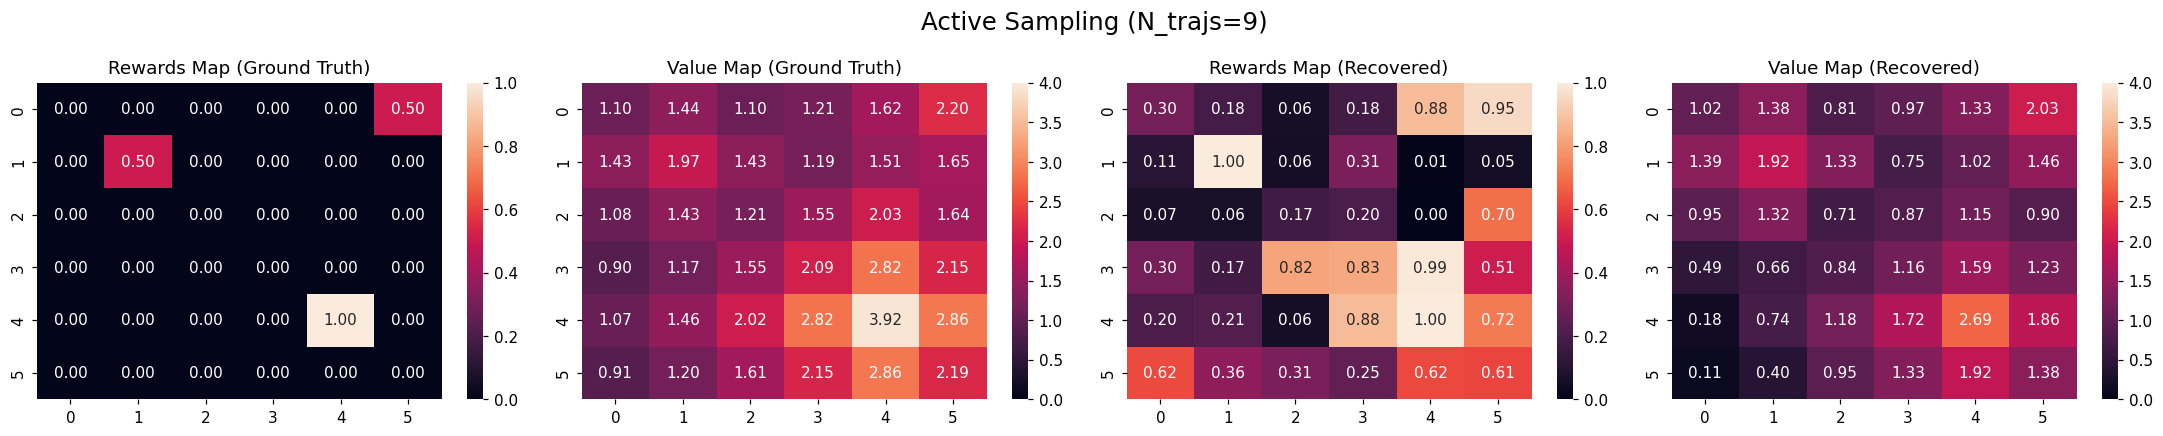

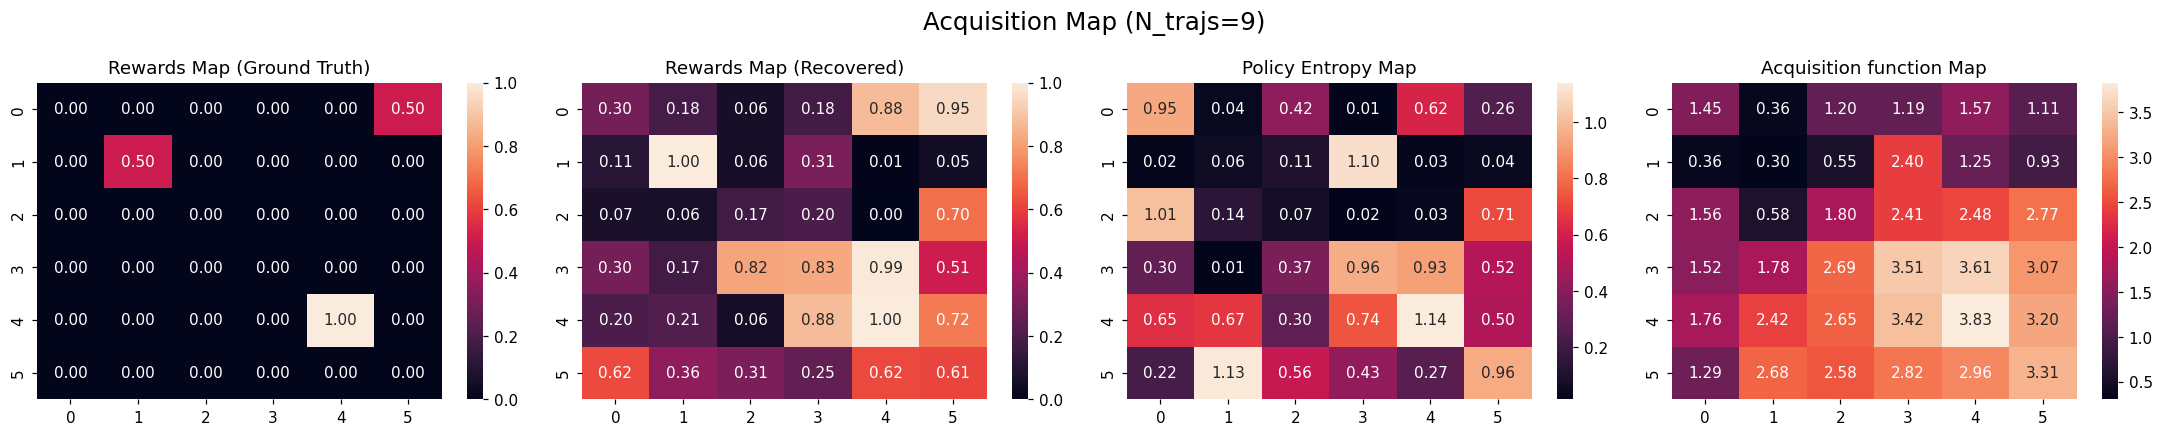

In [30]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

In [11]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type grid
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.02
--n_iters 30
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 1.0
--weight_decay 0.5
--hiddens 3 3
--device cuda
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.7064 0.7172 0.693  0.6569 0.7488 0.6884]
 [0.6392 0.7316 0.6901 0.6879 0.7202 0.7231]
 [0.6815 0.7231 0.6933 0.6998 0.6986 0.7171]
 [0.7464 0.7108 0.6987 0.6591 0.7161 0.6485]
 [0.736  0.6172 0.6853 0.9495 1.     0.9426]
 [0.6549 0.7369 0.2546 0.     0.8351 0.9403]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 1.184899 ---
[INFO - n_trajs:1] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 5 1]
 [0 0 0 1 2 1]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.723  0.7027 0.7812 0.7181 0.7697 0.6743]
 [0.7163 0.688  0.7435 0.7281 0.7537 0.7547]
 [0.7056 0.7786 0.6565 0.7106 0.6472 0.7626]
 [0.7634 0.743  0.741  0.7009 0.9866 0.6916]
 [0.7076 0.7699 0.7344 0.9831 0.9985 1.    ]
 [0.7322 0.6876 0.     0.0244 0.6765 0.7317]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 1.263926 ---
[INFO - n_trajs:2] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 6 1]
 [0 0 2 2 4 1]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[0.6741 0.6911 0.7203 0.6838 0.6669 0.729 ]
 [0.6615 0.6815 0.656  0.754  0.6995 0.7091]
 [0.6554 0.62   0.606  0.6799 0.6632 0.7501]
 [0.713  0.7806 0.7063 0.6976 0.9787 0.6397]
 [0.709  0.666  0.     0.9861 1.     0.953 ]
 [0.6508 0.1461 0.7208 0.2953 0.9387 0.7829]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 1.168178 ---
[INFO - n_trajs:3] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 2 0]
 [0 1 0 1 6 1]
 [0 1 2 2 4 1]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.6244 0.6172 0.6076 0.56   0.61   0.5592]
 [0.5528 0.6439 0.5155 0.6308 0.5814 0.6449]
 [0.6612 0.593  0.5532 0.5746 0.6424 0.6192]
 [0.6298 0.9498 0.9357 1.     0.9484 0.6142]
 [0.5624 0.7903 0.1628 0.8431 0.9886 0.9366]
 [0.3238 0.     0.6565 0.4371 0.7953 0.7164]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 1.145599 ---
[INFO - n_trajs:4] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 2 1]
 [0 1 0 1 9 2]
 [0 1 2 2 5 1]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.5371 0.5381 0.5781 0.558  0.6153 0.6065]
 [0.633  0.5571 0.5814 0.5851 0.6699 0.5806]
 [0.5739 0.6243 0.5381 0.5497 0.5335 0.1985]
 [0.5577 0.9614 0.962  1.     0.9262 0.    ]
 [0.6289 0.802  0.124  0.8562 0.978  0.8835]
 [0.2279 0.1529 0.6149 0.3768 0.8535 0.702 ]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 1.222472 ---
[INFO - n_trajs:5] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  2  2  2  4  1]
 [ 0  1  0  1 10  2]
 [ 0  1  2  2  5  1]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.6191 0.6224 0.684  0.6848 0.6935 0.5877]
 [0.6235 0.6758 0.6816 0.6247 0.6692 0.6748]
 [0.5946 0.1126 0.1161 0.19   0.3561 0.    ]
 [0.1046 0.98   0.9944 1.     0.9687 0.0884]
 [0.342  0.7419 0.0851 0.8553 0.9706 0.9368]
 [0.117  0.1824 0.5298 0.2297 0.9201 0.6123]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 1.207118 ---
[INFO - n_trajs:6] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  2  3  5  2]
 [ 0  1  0  1 10  3]
 [ 0  1  2  2  5  1]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[0.5999 0.6598 0.5825 0.0721 0.269  0.3818]
 [0.6608 0.6436 0.3023 0.0591 0.1825 0.2188]
 [0.5618 0.     0.2536 0.6944 0.0562 0.1528]
 [0.2816 0.8891 0.9023 0.921  0.9321 0.7675]
 [0.4148 0.625  0.1533 0.7323 1.     0.9558]
 [0.1917 0.1899 0.5215 0.3329 0.8849 0.6729]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 0.959516 ---
[INFO - n_trajs:7] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  1  2  1  0]
 [ 0  2  2  3  6  2]
 [ 0  1  0  1 12  3]
 [ 0  1  2  2  5  1]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.5191 0.4786 0.5992 0.204  0.2592 0.3278]
 [0.4975 0.5398 0.1282 0.0437 0.0721 0.2597]
 [0.5704 0.185  0.1416 0.8343 0.9386 0.0257]
 [0.1004 0.8943 0.8679 0.9624 1.     0.817 ]
 [0.3088 0.5915 0.1254 0.7049 0.9209 0.8573]
 [0.143  0.     0.4516 0.2566 0.8254 0.5631]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 1.346548 ---
[INFO - n_trajs:8] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  1  0  0  0  0]
 [ 0  4  1  1  0  0]
 [ 0  0  1  2  1  0]
 [ 0  2  2  3  6  2]
 [ 0  1  0  1 12  3]
 [ 0  1  2  2  5  1]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.1435 0.1116 0.0944 0.0792 0.1765 0.3277]
 [0.1344 0.9877 0.6676 0.1169 0.0785 0.2238]
 [0.1155 0.0338 0.0279 0.8923 0.9195 0.    ]
 [0.1389 0.9212 0.8774 0.9536 0.9842 0.8173]
 [0.1352 0.6653 0.025  0.7842 1.     0.9764]
 [0.2547 0.014  0.4083 0.2031 0.8949 0.5321]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 0.938220 ---
[INFO - n_trajs:9] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  1  0  0  0  0]
 [ 0  4  1  1  0  0]
 [ 0  0  1  2  1  0]
 [ 0  2  2  3  6  2]
 [ 0  1  0  2 16  3]
 [ 0  1  2  2  6  1]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.3119 0.1271 0.2759 0.2795 0.4349 0.483 ]
 [0.1245 0.9538 0.679  0.1212 0.1673 0.2242]
 [0.3098 0.1466 0.1526 0.8447 0.9336 0.1329]
 [0.2125 0.8929 0.8924 0.903  1.     0.7923]
 [0.4204 0.7166 0.     0.7837 0.9756 0.9528]
 [0.3701 0.2793 0.5994 0.2897 0.8696 0.713 ]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 0.959944 ---


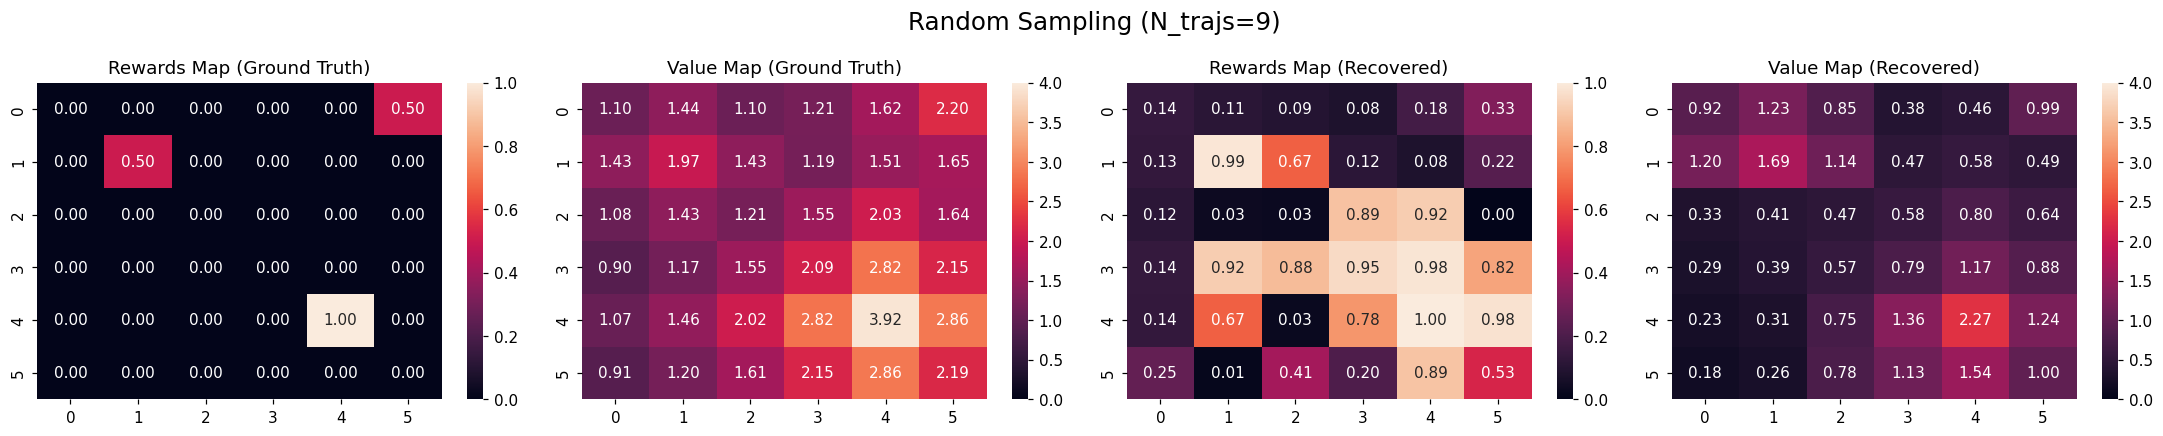

In [12]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)

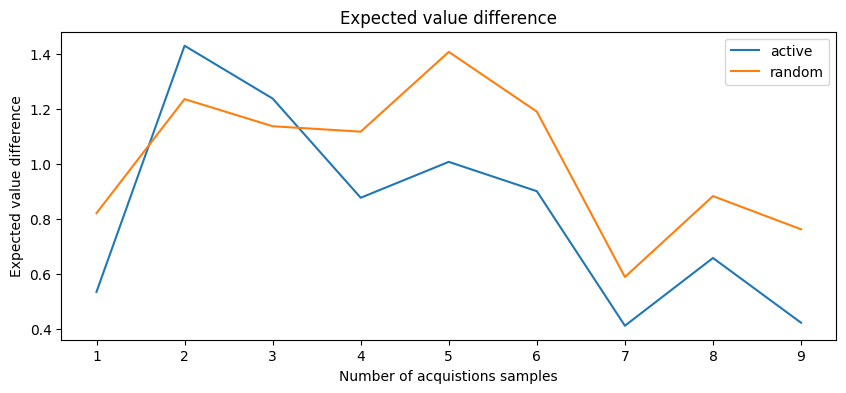

In [18]:
evd_act = get_evd(history_deepmaxent_active)
evd_rand = get_evd(history_deepmaxent_random)
draw_evd(evd_act[None, :], evd_rand[None, :])